# Part II - (Ford GoBike System Data 2019)
## by (Oluwatosin Olanrewaju)


## Investigation Overview


**Exploring the variables of the Ford GoBike System Data 2019 of the greater San Francisco Bay area, visualizing the dataset variables to see there impact of time duration of riding on other variables.**


**Some Insights:**
> **Longer trip durations are common in subscribers due to their passion for riding as a recreation.
> Young people spend more time riding and are mainly consistent during the week days.**

## Dataset Overview

> **This data set 'Ford GoBike System Data' includes information about individual rides in a bike-sharing system covering the greater San Francisco Bay area for the year 2019.**

Rows: 174,952
Columns: 14 

In the investigation I used the following features in the cleaned 'df.csv':

>user_type (values: “Subscriber” or “Customer”)

>duration_min (duration of trip in minutes)

>t_hour (hour of start of biketrip)

>t_day (day of week of start of biketrip)

>Age and Gender

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike_df = pd.read_csv('df.csv') #loading the dataset of ford_bikes

In [3]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 14 columns):
duration_sec               174952 non-null int64
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
t_month                    174952 non-null object
t_day                      174952 non-null object
t_hour                     174952 non-null int64
member_age                 174952 non-null int64
grouped_ages               174952 non-null object
dtypes: float64(2), int64(4), object(8)
memory usage: 18.7+ MB


## Most frequent trip duration

> **The average trip duration of bike users is 704 secs and the plot above shows a rightly skewed distribution.**


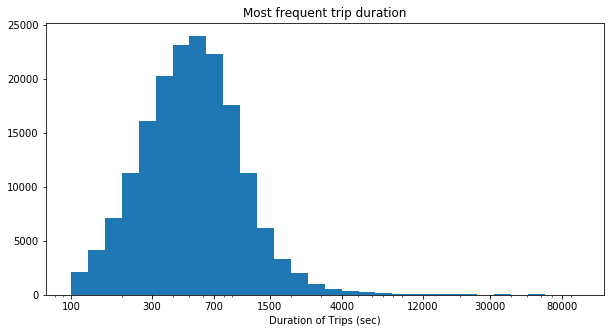

In [4]:
# duration. Using numpy arange to create appropriate bins
bins = 10 ** np.arange(2, 5.0 + 0.1, 0.1) 
plt.figure(figsize=[10, 5])
plt.hist(data=bike_df, x='duration_sec', bins=bins)
ticks = [100, 300, 700 , 1500, 4000, 12000, 30000, 80000]
labels = ['{}'.format(val) for val in ticks]
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Duration of Trips (sec)')
plt.title('Most frequent trip duration')
plt.show();

# (Daily Trips Frequency)

> Weekends has far less trips than weekdays.

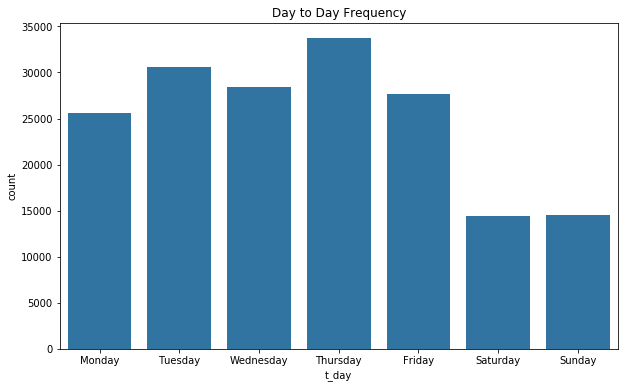

In [5]:
# A countplot of bike usage based on days of the week
base_color = sb.color_palette()[0]
day_name = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

plt.figure(figsize=(10,6))
plt.title('Day to Day Frequency')
sb.countplot(data=bike_df, x='t_day', order=day_name, color=base_color);

## The Distribution of the Age of the Users

>**From the visual below, we notice that most users are 25-35 years old. Plot distribution is rightly skewed.**

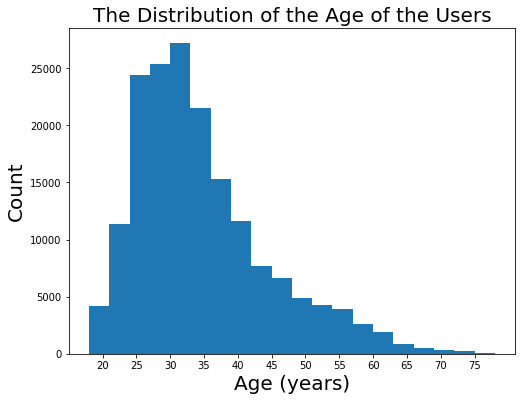

In [6]:
bins=np.arange(18,81,3)
plt.figure(figsize=[8,6])
ax=plt.hist(data=bike_df,x='member_age',bins=bins)
plt.xticks(np.arange(20,80,5))
plt.xlabel('Age (years)',size=20)
plt.ylabel('Count', size=20)
plt.title('The Distribution of the Age of the Users',size=20);

## (Age and Duration of Trip)

>**The scatter plot of the duration and age shows a weak negative relationship. The older the user, the shorter the duration of the trip as compared to the younger user. Younger people tend to spend more time riding.**

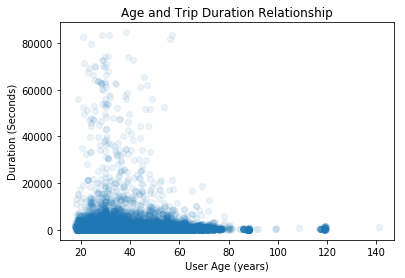

In [7]:
#Scatter plot representation of age and duration
sb.regplot(data=bike_df,x='member_age',y='duration_sec',fit_reg=False, x_jitter=0.4, scatter_kws={'alpha':1/12})
plt.xlabel('User Age (years)')
plt.ylabel('Duration (Seconds)')
plt.title('Age and Trip Duration Relationship');

## (User types and Trip Duration)

Longer trip durations are common in subscribers than customers

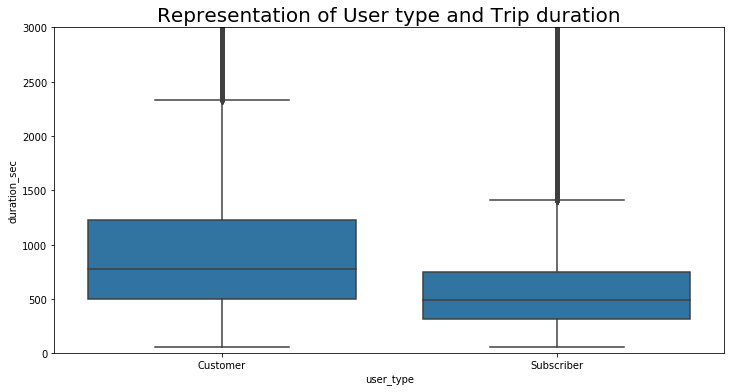

In [8]:
#Using the box plots to represent duration and user types 
plt.figure(figsize=(12,6)) 
plt.ylim(0, 3000) #reduced the ylim to represent the data fully
sb.boxplot(data=bike_df, x='user_type', y='duration_sec', color=base_color);
plt.title('Representation of User type and Trip duration',size=20);

## (Duration of trips in relation to gender)

**Female had tend to take longer trips (duration) than male**

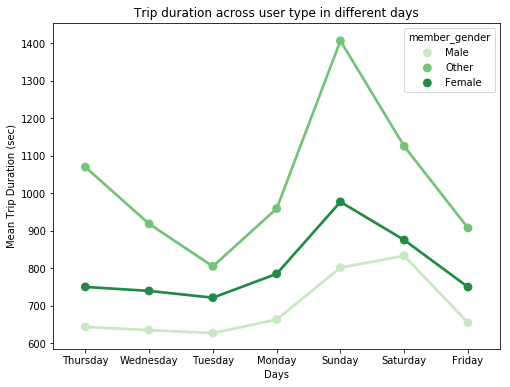

In [9]:
#a point plot to show the relationship of the mean of trip duration on each day per gender
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = bike_df, x = 't_day', y = 'duration_sec', hue = 'member_gender', palette = 'Greens', ci=None)
plt.title('Trip duration across user type in different days')
plt.ylabel('Mean Trip Duration (sec)')
plt.xlabel('Days')
plt.show();

## (Day of the Week, Hour & User type Relationship)

>**The heatmap shows the distribution of rides during the weekdays, which depends on the hour of the day and day of the week.
Week days are most active between the hours of  (7-9 AM, 4-6 PM).**

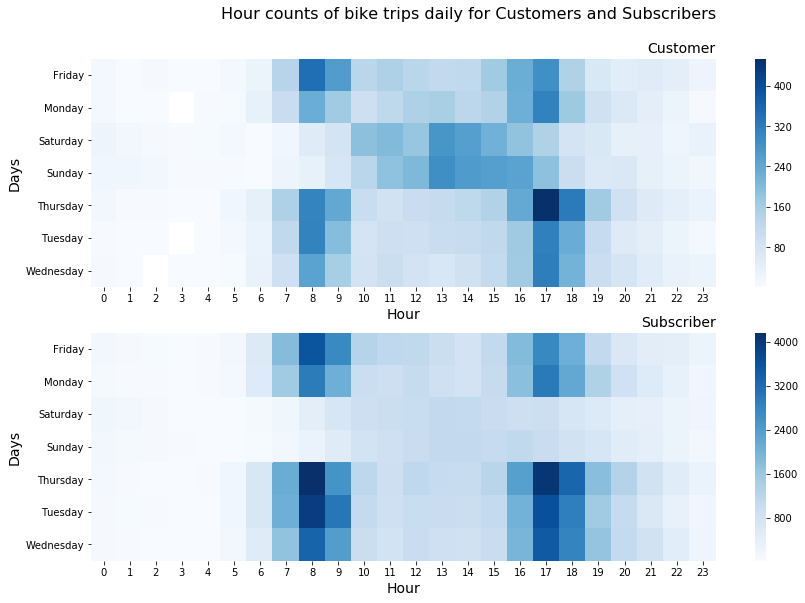

In [10]:
plt.figure(figsize=(14,9))

plt.subplot(2, 1, 1)
customers = bike_df.query('user_type == "Customer"')
cust_cnts = customers.groupby(['t_day', 't_hour']).size()
cust_cnts = cust_cnts.reset_index(name='count')
cust_cnts = cust_cnts.pivot(index='t_day', columns='t_hour', values='count')
sb.heatmap(cust_cnts, cmap="Blues");
plt.title('Customer', loc='right', fontsize=14);
plt.xlabel('Hour', fontsize=14);
plt.ylabel('Days', fontsize=14);

plt.subplot(2, 1, 2)
subscribers = bike_df.query('user_type == "Subscriber"')
sub_cnts = subscribers.groupby(['t_day', 't_hour']).size()
sub_cnts = sub_cnts.reset_index(name='count')
sub_cnts = sub_cnts.pivot(index='t_day', columns='t_hour', values='count')
sb.heatmap(sub_cnts, cmap="Blues");
plt.title('Subscriber', loc='right', fontsize=14);
plt.xlabel('Hour', fontsize=14);
plt.ylabel('Days', fontsize=14);

plt.subplots_adjust(top=0.9)
plt.suptitle('Hour counts of bike trips daily for Customers and Subscribers', fontsize=16);
